# Predicción de Embarazo en la EPS Comparta con Machine Learning utilizando arboles de desición

## Inicio


In [0]:
#Importamos las librerias necesarias

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#leemos el documento de 4505 primer trimestre, utilizamos encoding latin1 ya que utf-8 nos genera error

data_1 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Datasets/primer trimeste 4505 2018 completo.csv", sep="|")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#leemos el documento de 4505 segundo trimestre, utilizamos encoding latin1 ya que utf-8 nos genera error

data_2 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Datasets/segundo trimeste 4505 2018 completo.csv", sep="|")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#leemos el documento de 4505 tercer trimestre, utilizamos encoding latin1 ya que utf-8 nos genera error

data_3 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Datasets/tercer trimeste 4505 2018 completo.csv", sep="|")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#leemos el documento de 4505 cuarto trimestre, utilizamos encoding latin1 ya que utf-8 nos genera error

data_4 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Datasets/cuarto trimeste 4505 2018 completo.csv", sep="|")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Conociendo nuestro dataset

In [0]:
#mostramos los elementos para ver si se cargo bien el documento 
#dataset completo original

data_4.head()

,tipo_registro,consecutivo_registro,codigo_ips,tipo_ir,numero_id,primer_apellido,segundo_apellido,primer_nombre,segundo_nombre,fecha_nacimiento,sexo,etnia,ocupacion,nivel_educativo,gestacion,sifilis_gestacional,hipertension_por_gestacion,hipotiroidismo_congenito,sintomatico_respiratorio,tuberculosis_multidrogoresistente,lepra,obesidad_o_desnutricion,victima_maltrato,victima_violencia_sexual,infecciones_trasmision_sexual,enfermedad_mental,cancer_cervix,cancer_seno,fluorosis_dental,fecha_peso,peso_kg,fecha_talla,talla_cm,fecha_probable_parto,edad_gestacional_nacer,bcg,hepatitis_b_menores_1_anho,pentavalente,polio,dpt_menores_5_anhos,...,Resultado Antigeno de Superficie Hepatitis B en Gestantes,Fecha Serologia para Sifilis,Resultado Serologia para Sifilis,Fecha de Toma de Elisa para VIH,Resultado Elisa para VIH,Fecha TSH Neonatal,Resultado de TSH Neonatal,Tamizaje Cancer de Cuello Uterino,Citologia Cervico uterina,Citologia Cervico uterina Resultados segun Bethesda,Calidad en la Muestra de Citologia Cervicouterina,Codigo de habilitacion IPS donde se toma Citologia Cervicouterina,Fecha de Colposcopia,Codigo de habilitacion IPS donde se toma Colposcopia,Fecha de biopsia cervical,Resultado de Biopsia Cervical,Codigo de habilitacion IPS donde se toma biopsia,Fecha Mamografia,Resultado Mamografia,Codigo de habilitacion IPS donde se toma Mamografia,Fecha Toma Biopsia Seno por BACAF,Fecha Resultado Biopsia Seno por BACAF,Biopsia Seno por BACAF,Codigo de habilitacion IPS donde se toma Biopsia Seno por BACAF,Fecha Toma de Hemoglobina,Hemoglobina,Fecha de la Toma de Glicemia Basal,Fecha Creatinina,Creatinina,Fecha Hemoglobina Glicosilada,Hemoglobina Glicosilada,Fecha Toma de Microalbuminuria,Fecha Toma de HDL,Fecha Toma de Baciloscopia de Diagnostico,Baciloscopia de Diagnostico,Tratamiento para Hipotiroidismo Congenito,Tratamiento para Sifilis gestacional,Tratamiento para Sifilis Congenita,Tratamiento para Lepra,Fecha de Terminacion Tratamiento para Leishmaniasis
0,2,1,132680002101,AS,13268D0016,MONTERO,ANDEA,LUIS,ALFREDO,1987-04-05,M,6,9999,13,0,0,0,0,2,2,3,3,0,2,2,7,0,21,2,2018-12-18,57,2018-12-18,158,1845-01-01,0,0,0,0,0,0,...,0,1845-01-01,0,1845-01-01,0,1845-01-01,0,0,1845-01-01,0,0,0,1845-01-01,0,1845-01-01,0,0,1845-01-01,0,0,1845-01-01,1845-01-01,0,0,1845-01-01,0.0,1845-01-01,1845-01-01,0.0,1845-01-01,0.0,1845-01-01,1845-01-01,1845-01-01,4,0,0,0,0,1845-01-01
1,2,2,132680002101,AS,13268D0058,QUINTERO,AABA,GRECA,AOA,1986-10-21,F,6,9999,13,2,0,0,0,2,2,3,3,0,2,2,7,0,21,2,2018-12-10,63,2018-12-10,162,1845-01-01,0,0,0,0,0,0,...,0,1845-01-01,0,1845-01-01,0,1845-01-01,0,0,1845-01-01,0,0,0,1845-01-01,0,1845-01-01,0,0,1845-01-01,0,0,1845-01-01,1845-01-01,0,0,1845-01-01,0.0,1845-01-01,1845-01-01,0.0,1845-01-01,0.0,1845-01-01,1845-01-01,1845-01-01,4,0,0,0,0,1845-01-01
2,2,3,132680002101,AS,13268D0086,POANCO,ROBLES,ELA,NONE,1987-03-29,F,6,9999,13,2,0,0,0,2,2,3,3,0,2,2,7,0,21,2,2018-12-27,65,2018-12-27,164,1845-01-01,0,0,0,0,0,0,...,0,1845-01-01,0,1845-01-01,0,1845-01-01,0,0,1845-01-01,0,0,0,1845-01-01,0,1845-01-01,0,0,1845-01-01,0,0,1845-01-01,1845-01-01,0,0,1845-01-01,0.0,1845-01-01,1845-01-01,0.0,1845-01-01,0.0,1845-01-01,1845-01-01,1845-01-01,4,0,0,0,0,1845-01-01
3,2,4,132680002101,AS,13268D0091,ARCA,BERRUECO,YULI,JHAA,1986-04-04,F,6,9999,13,2,0,0,0,2,2,3,3,0,2,2,7,0,21,2,2018-12-17,62,2018-12-17,158,1845-01-01,0,0,0,0,0,0,...,0,1845-01-01,0,1845-01-01,0,1845-01-01,0,0,1845-01-01,0,0,0,1845-01-01,0,1845-01-01,0,0,1845-01-01,0,0,1845-01-01,1845-01-01,0,0,1845-01-01,0.0,1845-01-01,1845-01-01,0.0,1845-01-01,0.0,1845-01-01,1845-01-01,1845-01-01,4,0,0,0,0,1845-01-01
4,2,5,132680002101,AS,13268D0198,ELLES,MONTESINO,CRISPINANO,NONE,1987-02-11,M,6,9999,13,0,0,0,0,2,2,3,3,0,2,2,7,0,21,2,2018-12-14,61,2018-12-14,162,1845-01-01,0,0,0,0,0,0,...,0,1845-01-01,0,1845-01-01,0,1845-01-01,0,0,1845-01-01,0,0,0,1845-01-01,0,1845-01-01,0,0,1845-01-01,0,0,1845-01-01,1845-01-01,0,0,1845-01-01,0.0,1845-01-01,1845-01-01,0.0,1845-01-01,0.0,1845-01-01,1845-01-01,1845-01

In [0]:
#Número de columnas y registros

data_1.shape

(467323, 119)

In [0]:

data_1.filter('gestacion' == 0).filter('gestacion' == 2)

TypeError: ignored

In [0]:

data_2.shape

(531699, 119)

In [0]:

data_3.shape

(559453, 119)

In [0]:

data_4.shape

(599790, 119)

In [0]:
frames = [data_1, data_2, data_3, data_4]
data = pd.concat(frames)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [0]:
data.shape 

(2158265, 122)

In [0]:
data.head()

,Asesoria Pos test Elisa para VIH,Asesoria Pre test Elisa para VIH,Baciloscopia de Diagnostico,Biopsia Seno por BACAF,Calidad en la Muestra de Citologia Cervicouterina,Citologia Cervico uterina,Citologia Cervico uterina Resultados segun Bethesda,Codigo de habilitacion IPS donde se toma Biopsia Seno por BACAF,Codigo de habilitacion IPS donde se toma Citologia Cervicouterina,Codigo de habilitacion IPS donde se toma Colposcopia,Codigo de habilitacion IPS donde se toma Mamografia,Codigo de habilitacion IPS donde se toma biopsia,Consulta Mujer o Menor Victima del Maltrato,Consulta Nutricion,Consulta Victimas de Violencia Sexual,Consulta de Adulto Primera vez,Consulta de Crecimiento y Desarrollo Primera vez,Consulta de Joven Primera vez,Consulta de Psicologia,Consulta por Oftalmologia,Control Prenatal,Control Prenatal de Primera vez,Control Recien Nacido,Control de Placa Bacteriana,Creatinina,Fecha de la Toma de Glicemia Basal,Fecha Antigeno de Superficie Hepatitis B en Gestantes,Fecha Creatinina,Fecha Diagnostico Desnutricion Proteico Calorica,Fecha Hemoglobina Glicosilada,Fecha Mamografia,Fecha Resultado Biopsia Seno por BACAF,Fecha Serologia para Sifilis,Fecha Suministro de Metodo Anticonceptivo,Fecha TSH Neonatal,Fecha Toma Biopsia Seno por BACAF,Fecha Toma de Baciloscopia de Diagnostico,Fecha Toma de HDL,Fecha Toma de Hemoglobina,Fecha Toma de Microalbuminuria,...,enfermedad_mental,etnia,fecha_nacimiento,fecha_peso,fecha_probable_parto,fecha_talla,fiebre_amarilla_ninhos_1_anho,fluorosis_dental,gestacion,hepatitis_A,hepatitis_b_menores_1_anho,hipertension_por_gestacion,hipotiroidismo_congenito,infecciones_trasmision_sexual,influenza_ninhos,lepra,neumococo,nivel_educativo,numero_id,obesidad_o_desnutricion,ocupacion,pentavalente,peso_kg,polio,primer_apellido,primer_nombre,rotavirus,segundo_apellido,segundo_nombre,sexo,sifilis_gestacional,sintomatico_respiratorio,talla_cm,tipo_ir,tipo_registro,triple_viral_ninhos,tuberculosis_multidrogoresistente,victima_maltrato,victima_violencia_sexual,virus_papiloma_humano
0,1845-01-01,1845-01-01,4,0,999,1800-01-01,999,0,999,999,0,999,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1800-01-01,1845-01-01,1845-01-01,0,1845-01-01,1845-01-01,22,0.0,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1800-01-01,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1845-01-01,...,21,6,1998-08-15,2018-02-24,1845-01-01,2018-02-24,0,21,21,0,0,0,0,21,0,21,0,8,1000118873,21,9998,0,48.0,0,ROMERO,CAROL,0,PULIDO,NATALIA,F,0,21,151,CC,2,0,0,21,21,22
1,1845-01-01,1845-01-01,4,0,999,1800-01-01,999,0,999,999,0,999,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1800-01-01,1845-01-01,1845-01-01,0,1845-01-01,1845-01-01,1,0.0,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1800-01-01,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1845-01-01,...,21,6,1996-03-26,1800-01-01,1845-01-01,1800-01-01,0,2,2,0,0,0,0,2,0,21,0,13,1000774591,3,9999,0,999.0,0,MENDEZ,TALIA,0,CA?ON,MICHEL,F,0,2,999,CC,2,0,0,21,21,22
2,1800-01-01,1800-01-01,22,0,999,1800-01-01,999,0,999,999,0,999,1845-01-01,1800-01-01,1845-01-01,1845-01-01,1845-01-01,1800-01-01,1845-01-01,1845-01-01,0,1845-01-01,1845-01-01,1,0.0,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1800-01-01,1845-01-01,1845-01-01,1800-01-01,1800-01-01,1845-01-01,1845-01-01,1800-01-01,1845-01-01,1845-01-01,1800-01-01,...,21,6,1988-07-23,1800-01-01,1845-01-01,1800-01-01,0,21,2,0,0,0,0,21,0,3,0,13,1001779214,21,9998,0,999.0,0,ROSANIA,MARIA,0,SCARPATI,DEJESUS,F,0,2,999,CC,2,0,21,21,21,22
3,1800-01-01,1800-01-01,4,0,999,1800-01-01,999,0,999,999,0,999,1845-01-01,1800-01-01,1845-01-01,1845-01-01,1845-01-01,1800-01-01,1845-01-01,1845-01-01,0,1845-01-01,1845-01-01,22,0.0,1845-01-01,1845-01-01,1845-01-01,1800-01-01,1800-01-01,1845-01-01,1845-01-01,1800-01-01,2018-03-17,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1845-01-01,1800-01-01,...,21,6,1994-08-11,2018-03-17,1845-01-01,2018-03-17,0,21,2,0,0,0,0,21,

##Limpieza de datos

In [0]:
#Eliminamos los registros duplicados (de 2.158.265 se eliminan 131.437)
df2 = data.drop_duplicates()
df2.shape

(2026828, 122)

In [0]:
#Eliminamos los registros duplicados por tipo de identificacion y numero id (se eliminan 969971)

df = df2.drop_duplicates(['tipo_ir', 'numero_id'], keep='first', inplace=False) 
df.shape

(1056857, 122)

In [0]:
#Creamos un subconjunto con las columnas que vamos a trabajar

subset = df[['fecha_nacimiento', 'sexo', 'etnia', 'ocupacion', 'nivel_educativo', 'gestacion', 'obesidad_o_desnutricion', 'victima_maltrato', 'victima_violencia_sexual', 
               'infecciones_trasmision_sexual ', 'enfermedad_mental ', 'cancer_cervix', 'cancer_seno', 'peso_kg', 'talla_cm', 'virus_papiloma_humano', 
               'Suministro de Metodo Anticonceptivo']]
subset.head()

,fecha_nacimiento,sexo,etnia,ocupacion,nivel_educativo,gestacion,obesidad_o_desnutricion,victima_maltrato,victima_violencia_sexual,infecciones_trasmision_sexual,enfermedad_mental,cancer_cervix,cancer_seno,peso_kg,talla_cm,virus_papiloma_humano,Suministro de Metodo Anticonceptivo
0,1998-08-15,F,6,9998,8,21,21,21,21,21,21,21,21,48.0,151,22,21
1,1996-03-26,F,6,9999,13,2,3,21,21,2,21,2,2,999.0,999,22,21
2,1988-07-23,F,6,9998,13,2,21,21,21,21,21,21,21,999.0,999,22,21
3,1994-08-11,F,6,9998,2,2,2,3,21,21,21,21,21,41.0,155,22,21
4,1996-08-31,M,6,9998,13,0,21,0,21,21,21,0,21,999.0,999,0,15


In [0]:
#Nuesto nuevo dataset con las columnas que necesitamos 17
subset.shape

(1056857, 17)

In [0]:
#Tipos de datos de nuestro dataset
subset.dtypes

fecha_nacimiento                        object
sexo                                    object
etnia                                    int64
ocupacion                                int64
nivel_educativo                          int64
gestacion                                int64
obesidad_o_desnutricion                  int64
victima_maltrato                         int64
victima_violencia_sexual                 int64
infecciones_trasmision_sexual            int64
enfermedad_mental                        int64
cancer_cervix                            int64
cancer_seno                              int64
peso_kg                                float64
talla_cm                                 int64
virus_papiloma_humano                    int64
Suministro de Metodo Anticonceptivo      int64
dtype: object

In [0]:
#Encontramos si alguna columna tiene valores nulos

lista = []
columnas = subset.columns.values

for value in columnas:
    lista.append(pd.isnull(subset[value]).values.ravel().sum())
    
print(lista)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


##Mapeo de datos

In [0]:
#Calcularemos la edad en base a la fecha de nacimiento

#Funcion para calcular la edad en base a 2018

def calcula_edad(cuando,anio):
    momento = cuando[:4]
    return anio - int(momento)

subset['edad']=subset.apply(lambda x: calcula_edad(x['fecha_nacimiento'],2018), axis=1);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
subset['edad'].describe()

count    1.056857e+06
mean     2.730295e+01
std      2.220605e+01
min      0.000000e+00
25%      1.000000e+01
50%      2.000000e+01
75%      4.300000e+01
max      1.180000e+02
Name: edad, dtype: float64

In [0]:
subset.dtypes

fecha_nacimiento                        object
sexo                                    object
etnia                                    int64
ocupacion                                int64
nivel_educativo                          int64
gestacion                                int64
obesidad_o_desnutricion                  int64
victima_maltrato                         int64
victima_violencia_sexual                 int64
infecciones_trasmision_sexual            int64
enfermedad_mental                        int64
cancer_cervix                            int64
cancer_seno                              int64
peso_kg                                float64
talla_cm                                 int64
virus_papiloma_humano                    int64
Suministro de Metodo Anticonceptivo      int64
edad                                     int64
dtype: object

In [0]:
#Mapeo de sexo
subset.loc[subset['sexo'] == 'M', 'sexoEncoded'] = 0 #hombre
subset.loc[subset['sexo'] == 'F', 'sexoEncoded'] = 1 #mujer

#Mapeo de gestacion
subset.loc[subset['gestacion'] == 0, 'gestacionEncoded'] = int(0) #no
subset.loc[subset['gestacion'] == 1, 'gestacionEncoded'] = int(1) #si
subset.loc[subset['gestacion'] == 2, 'gestacionEncoded'] = int(0) #no
subset.loc[subset['gestacion'] == 21, 'gestacionEncoded'] = int(0) #no

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


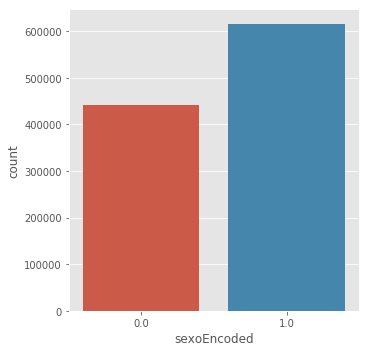

In [0]:
sb.factorplot('sexoEncoded',data=subset,kind="count")

In [0]:
subset.groupby('sexoEncoded').size()

sexoEncoded
0.0    441680
1.0    615177
dtype: int64

In [0]:
#Encontramos 182664 hombres y 280301 mujeres de las cuales 10380 estan embarazadas y 269921 no hay una probabilidad del 3.7% de quedar embarazada

subset[['sexoEncoded', 'gestacionEncoded']].groupby(['sexoEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

gestacionEncoded                 
                        mean   count      sum
sexoEncoded                                  
0.0                 0.000000  441680      0.0
1.0                 0.039041  615177  24017.0

In [0]:
#Sacamos un dataframe con solo datos de mujeres 
data_f = subset[subset['sexoEncoded'] == 1.0]
data_f.head()

,fecha_nacimiento,sexo,etnia,ocupacion,nivel_educativo,gestacion,obesidad_o_desnutricion,victima_maltrato,victima_violencia_sexual,infecciones_trasmision_sexual,enfermedad_mental,cancer_cervix,cancer_seno,peso_kg,talla_cm,virus_papiloma_humano,Suministro de Metodo Anticonceptivo,edad,sexoEncoded,gestacionEncoded
0,1998-08-15,F,6,9998,8,21,21,21,21,21,21,21,21,48.0,151,22,21,20,1.0,0.0
1,1996-03-26,F,6,9999,13,2,3,21,21,2,21,2,2,999.0,999,22,21,22,1.0,0.0
2,1988-07-23,F,6,9998,13,2,21,21,21,21,21,21,21,999.0,999,22,21,30,1.0,0.0
3,1994-08-11,F,6,9998,2,2,2,3,21,21,21,21,21,41.0,155,22,21,24,1.0,0.0
6,1998-10-29,F,6,9999,4,2,21,3,2,2,7,21,21,999.0,999,22,21,20,1.0,0.0


In [0]:
# Mapping edad en la que estan embarazadas
data_f.loc[ data_f['edad'] <= 12, 'edadEncoded']                          = int(0) #Menor de edad
data_f.loc[(data_f['edad'] > 12) & (data_f['edad'] <= 18), 'edadEncoded'] = int(1) #Adolecentes
data_f.loc[(data_f['edad'] > 18) & (data_f['edad'] <= 30), 'edadEncoded'] = int(2) #Jovenes
data_f.loc[(data_f['edad'] > 30) & (data_f['edad'] <= 60), 'edadEncoded'] = int(3) #Adultos
data_f.loc[ data_f['edad'] > 60, 'edadEncoded']                           = int(4) #Tercera edad

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
data_f[['edadEncoded', 'gestacionEncoded']].groupby(['edadEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

gestacionEncoded                 
                        mean   count      sum
edadEncoded                                  
0.0                 0.000268  171608     46.0
1.0                 0.053570   85626   4587.0
2.0                 0.124537  120197  14969.0
3.0                 0.025429  173623   4415.0
4.0                 0.000000   64123      0.0

In [0]:
#Sacamos un dataframe con solo datos de mujeres embarazadas
data_f_ok = data_f[data_f['gestacionEncoded'] == 1.0]
data_f_ok.head()

,fecha_nacimiento,sexo,etnia,ocupacion,nivel_educativo,gestacion,obesidad_o_desnutricion,victima_maltrato,victima_violencia_sexual,infecciones_trasmision_sexual,enfermedad_mental,cancer_cervix,cancer_seno,peso_kg,talla_cm,virus_papiloma_humano,Suministro de Metodo Anticonceptivo,edad,sexoEncoded,gestacionEncoded,edadEncoded
19,1993-02-20,F,6,9998,13,1,21,21,21,21,21,21,21,999.0,999,22,21,25,1.0,1.0,2.0
25,1993-10-25,F,5,9999,4,1,21,3,2,2,21,2,2,67.0,138,22,3,25,1.0,1.0,2.0
36,1997-06-30,F,6,9999,13,1,3,3,2,21,21,21,21,999.0,999,22,21,21,1.0,1.0,2.0
41,1990-06-21,F,6,9999,13,1,3,3,2,21,21,21,21,999.0,999,22,21,28,1.0,1.0,2.0
61,1992-10-20,F,6,9999,13,1,21,21,21,21,21,21,21,57.0,161,22,21,26,1.0,1.0,2.0


In [0]:
data_f_ok.shape

(24017, 21)

In [0]:
#dataframe con mujeres no embarazadas
data_f_ko = data_f[data_f['gestacionEncoded'] == 0.0]
data_f_ko.shape

(591160, 21)

In [0]:
#sacamos 30mil usuarias del dataframe de no embarazadas para concatenarlas al dataframe que si estan embarazadas
data_f_ko_ok = data_f_ko[data_f_ko['edadEncoded'] < 4].head(220000)

frames = [data_f_ok, data_f_ko_ok]
data_final = pd.concat(frames)

data_final.shape

(244017, 21)

In [0]:
data_final[['edadEncoded', 'gestacionEncoded']].groupby(['edadEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

gestacionEncoded                
                        mean  count      sum
edadEncoded                                 
0.0                 0.000760  60552     46.0
1.0                 0.172567  26581   4587.0
2.0                 0.223856  66869  14969.0
3.0                 0.049047  90015   4415.0

In [0]:
data_final.head()

,fecha_nacimiento,sexo,etnia,ocupacion,nivel_educativo,gestacion,obesidad_o_desnutricion,victima_maltrato,victima_violencia_sexual,infecciones_trasmision_sexual,enfermedad_mental,cancer_cervix,cancer_seno,peso_kg,talla_cm,virus_papiloma_humano,Suministro de Metodo Anticonceptivo,edad,sexoEncoded,gestacionEncoded,edadEncoded
19,1993-02-20,F,6,9998,13,1,21,21,21,21,21,21,21,999.0,999,22,21,25,1.0,1.0,2.0
25,1993-10-25,F,5,9999,4,1,21,3,2,2,21,2,2,67.0,138,22,3,25,1.0,1.0,2.0
36,1997-06-30,F,6,9999,13,1,3,3,2,21,21,21,21,999.0,999,22,21,21,1.0,1.0,2.0
41,1990-06-21,F,6,9999,13,1,3,3,2,21,21,21,21,999.0,999,22,21,28,1.0,1.0,2.0
61,1992-10-20,F,6,9999,13,1,21,21,21,21,21,21,21,57.0,161,22,21,26,1.0,1.0,2.0


In [0]:
#Mapeo de etnia
data_final.loc[ data_final['etnia'] <= 5, 'etniaEncoded']                        = int(1) #si pertenece a etnia
data_final.loc[(data_final['etnia'] > 5) & (data_final['etnia'] <= 6), 'etniaEncoded'] = int(0) #no pertenece a etnia

# Mapping codigo nivel educativo
data_final.loc[ data_final['nivel_educativo'] <= 2, 'educativoEncoded']                        = int(0) #prescolar y primaria
data_final.loc[(data_final['nivel_educativo'] > 2) & (data_final['nivel_educativo'] <= 6), 'educativoEncoded'] = int(1) #basica secundaria, media academica, media tecnica, normalista
data_final.loc[(data_final['nivel_educativo'] > 6) & (data_final['nivel_educativo'] <= 8), 'educativoEncoded'] = int(2) #tecnico profesional y tecnologo
data_final.loc[(data_final['nivel_educativo'] > 8) & (data_final['nivel_educativo'] <= 12), 'educativoEncoded'] = int(3) #profesional, especializacion, maestria y doctorado
data_final.loc[ data_final['nivel_educativo'] > 12, 'educativoEncoded'] = int(4) #ninguno

# Mapping obesidad
data_final.loc[data_final['obesidad_o_desnutricion'] == 3, 'obesidadEncoded'] = int(0) #no
data_final.loc[data_final['obesidad_o_desnutricion'] == 1, 'obesidadEncoded'] = int(1) #si obesidad
data_final.loc[data_final['obesidad_o_desnutricion'] == 2, 'obesidadEncoded'] = int(1) #si desnutricion
data_final.loc[data_final['obesidad_o_desnutricion'] == 21, 'obesidadEncoded'] = int(0) #no

# Mapping victima de maltrato
data_final.loc[data_final['victima_maltrato'] == 0, 'maltratoEncoded'] = int(0) #no
data_final.loc[data_final['victima_maltrato'] == 1, 'maltratoEncoded'] = int(1) #si es mujer victima de maltrato
data_final.loc[data_final['victima_maltrato'] == 2, 'maltratoEncoded'] = int(1) #si es menor victima de maltrato
data_final.loc[data_final['victima_maltrato'] == 3, 'maltratoEncoded'] = int(0) #no
data_final.loc[data_final['victima_maltrato'] == 21, 'maltratoEncoded'] = int(0) #no

# Mapping victima de violencia sexual
data_final.loc[data_final['victima_violencia_sexual'] == 2, 'violenciaSexualEncoded'] = int(0) #no
data_final.loc[data_final['victima_violencia_sexual'] == 1, 'violenciaSexualEncoded'] = int(1) #si
data_final.loc[data_final['victima_violencia_sexual'] == 21, 'violenciaSexualEncoded'] = int(0) #no riesgo no evaulado

#Mapping infecciones_trasmision_sexual
data_final.loc[data_final['infecciones_trasmision_sexual '] == 2, 'infeccionSexualEncoded'] = int(0) #no
data_final.loc[data_final['infecciones_trasmision_sexual '] == 1, 'infeccionSexualEncoded'] = int(1) #si
data_final.loc[data_final['infecciones_trasmision_sexual '] == 21, 'infeccionSexualEncoded'] = int(0) #no riesgo no evaulado

#Mapping enfermedad_mental
data_final.loc[ data_final['enfermedad_mental '] <= 6, 'enfermedadMentalEncoded']                        = int(1) # si enfermedad mental
data_final.loc[(data_final['enfermedad_mental '] > 6) & (data_final['enfermedad_mental '] <= 21), 'enfermedadMentalEncoded'] = int(0) #no

# Mapping metodo anticonceptivo
data_final.loc[data_final['Suministro de Metodo Anticonceptivo'] == 0, 'metodoanticonceptivoEncoded'] = int(0) #no aplica
data_final.loc[(data_final['Suministro de Metodo Anticonceptivo'] >= 1) & (data_final['Suministro de Metodo Anticonceptivo'] < 16), 'metodoanticonceptivoEncoded'] = int(1) #si
data_final.loc[ data_final['Suministro de Metodo Anticonceptivo'] > 15, 'metodoanticonceptivoEncoded']                        = int(0) # no se suministra por alguna razon



##Subcojunto de datos a utilizar para analisis de arbol de decisión

In [0]:
subset_final = data_final[['edadEncoded', 'gestacionEncoded', 'etniaEncoded', 'educativoEncoded', 'obesidadEncoded', 'maltratoEncoded', 'violenciaSexualEncoded', 'infeccionSexualEncoded', 
               'enfermedadMentalEncoded', 'metodoanticonceptivoEncoded', 'peso_kg', 'talla_cm']]
subset_final.head()

,edadEncoded,gestacionEncoded,etniaEncoded,educativoEncoded,obesidadEncoded,maltratoEncoded,violenciaSexualEncoded,infeccionSexualEncoded,enfermedadMentalEncoded,metodoanticonceptivoEncoded,peso_kg,talla_cm
19,2.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,999.0,999
25,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,67.0,138
36,2.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,999.0,999
41,2.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,999.0,999
61,2.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,161


In [0]:
subset_final.dtypes

edadEncoded                    float64
gestacionEncoded               float64
etniaEncoded                   float64
educativoEncoded               float64
obesidadEncoded                float64
maltratoEncoded                float64
violenciaSexualEncoded         float64
infeccionSexualEncoded         float64
enfermedadMentalEncoded        float64
metodoanticonceptivoEncoded    float64
peso_kg                        float64
talla_cm                         int64
dtype: object

In [0]:
#Pasamos los valores 999 que no se tienen registro a valores NaN
def peso_fix(peso_kg):
    if peso_kg==999:
        return None
    return peso_kg

subset_final['peso_kg']=subset_final.apply(lambda x: peso_fix(x['peso_kg']), axis=1);

#Pasamos los valores 999 que no se tienen registro a valores NaN
def talla_fix(talla_cm):
    if talla_cm==999:
        return None
    return talla_cm

subset_final['talla_cm']=subset_final.apply(lambda x: talla_fix(x['talla_cm']), axis=1);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
subset_final.head()

,edadEncoded,gestacionEncoded,etniaEncoded,educativoEncoded,obesidadEncoded,maltratoEncoded,violenciaSexualEncoded,infeccionSexualEncoded,enfermedadMentalEncoded,metodoanticonceptivoEncoded,peso_kg,talla_cm
19,2.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
25,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,67.0,138.0
36,2.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
41,2.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
61,2.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,161.0


In [0]:
#Vamos a pasar los valores NaN de peso a valores promedio teniendo en cuenta su desviacion standard

peso_avg = subset_final['peso_kg'].mean()
peso_std = subset_final['peso_kg'].std()
peso_null_count = subset_final['peso_kg'].isnull().sum()
peso_null_random_list = np.random.randint(peso_avg - peso_std, peso_avg + peso_std, size=peso_null_count)

conValoresNulos = np.isnan(subset_final['peso_kg'])

subset_final.loc[np.isnan(subset_final['peso_kg']), 'peso_kg'] = peso_null_random_list
subset_final['peso_kg'] = subset_final['peso_kg'].astype(int)
print("Peso Promedio: " + str(peso_avg))
print("Desvió Std Peso: " + str(peso_std))
print("Intervalo para asignar Peso aleatorio: " + str(int(peso_avg - peso_std)) + " a " + str(int(peso_avg + peso_std)))

Peso Promedio: 48.953370943900936
Desvió Std Peso: 23.798947064105203
Intervalo para asignar Peso aleatorio: 25 a 72


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.pa

In [0]:
#Vamos a pasar los valores NaN de talla a valores promedio teniendo en cuenta su desviacion standard

talla_avg = subset_final['talla_cm'].mean()
talla_std = subset_final['talla_cm'].std()
talla_null_count = subset_final['talla_cm'].isnull().sum()
talla_null_random_list = np.random.randint(talla_avg - talla_std, talla_avg + talla_std, size=talla_null_count)

conValoresNulos = np.isnan(subset_final['talla_cm'])

subset_final.loc[np.isnan(subset_final['talla_cm']), 'talla_cm'] = talla_null_random_list
subset_final['talla_cm'] = subset_final['talla_cm'].astype(int)
print("Talla Promedio: " + str(talla_avg))
print("Desvió Std Talla: " + str(talla_std))
print("Intervalo para asignar Talla aleatoria: " + str(int(talla_avg - talla_std)) + " a " + str(int(talla_avg + talla_std)))

Talla Promedio: 140.41106355690007
Desvió Std Talla: 29.828932661408373
Intervalo para asignar Talla aleatoria: 110 a 170


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [0]:
subset_final.head()

,edadEncoded,gestacionEncoded,etniaEncoded,educativoEncoded,obesidadEncoded,maltratoEncoded,violenciaSexualEncoded,infeccionSexualEncoded,enfermedadMentalEncoded,metodoanticonceptivoEncoded,peso_kg,talla_cm
19,2.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,61,160
25,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,67,138
36,2.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,55,132
41,2.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,46,149
61,2.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,57,161


In [0]:
subset_final.shape

(244017, 12)

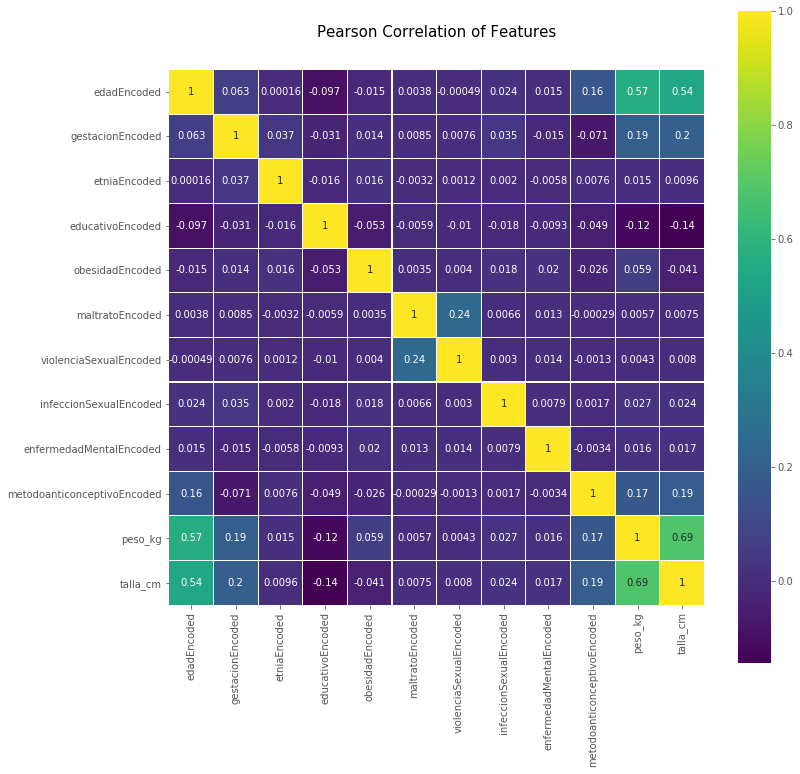

In [0]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(subset_final.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

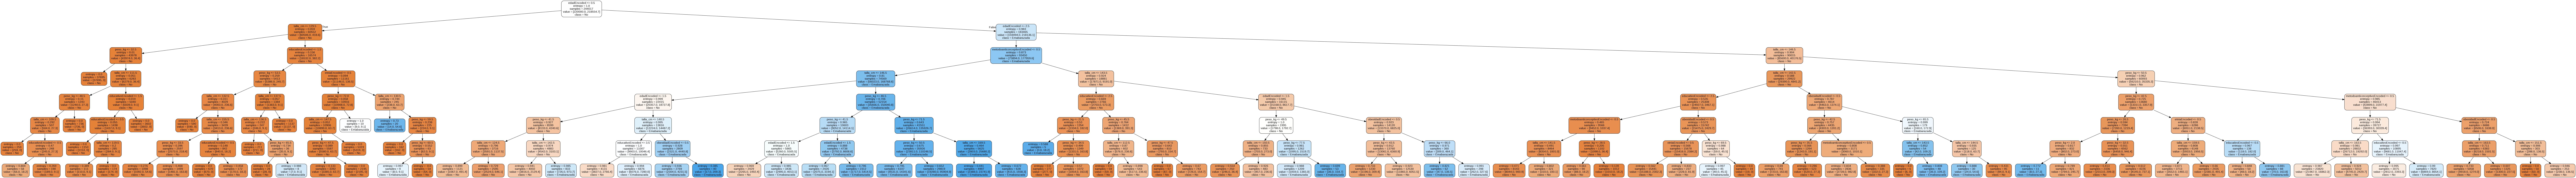

In [0]:
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a gestacionEncoded o no 
y_train = subset_final['gestacionEncoded']
x_train = subset_final.drop(['gestacionEncoded'], axis=1).values 

# Crear Arbol de decision con profundidad = 7
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 7,
                                            class_weight={1:9.1})
decision_tree.fit(x_train, y_train)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(subset_final.drop(['gestacionEncoded'], axis=1)),
                              class_names = ['No', 'Emabarazada'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

In [0]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

77.01


In [0]:
#Testeamos nuestro arbol con pruebas

#predecir embarazo sujeto de prueba 1

x_test = pd.DataFrame(columns=('edadEncoded', 'gestacionEncoded', 'etniaEncoded', 'educativoEncoded', 'obesidadEncoded', 'maltratoEncoded', 'violenciaSexualEncoded', 'infeccionSexualEncoded', 'enfermedadMentalEncoded', 'Suministro de Metodo Anticonceptivo', 'peso_kg', 'talla_cm'))
x_test.loc[0] = (4,1,0,3,0,0,0,0,0,1,66,165)
y_pred = decision_tree.predict(x_test.drop(['gestacionEncoded'], axis = 1))
print("Prediccion: " + str(y_pred))
y_proba = decision_tree.predict_proba(x_test.drop(['gestacionEncoded'], axis = 1))
print("Probabilidad de Acierto: " + str(round(y_proba[0][int(y_pred)]* 100, 2))+"%")

Prediccion: [0.]
Probabilidad de Acierto: 66.14%
